In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [2]:

m_df = pd.read_csv('Mtot_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'M']) 

print(m_df.head())


     time         M
0       0  0.000750
1   25000  0.001003
2   50000  0.001289
3   75000  0.001605
4  100000  0.001939


## EPS

In [3]:

eps_df = pd.read_csv('EPS_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'EPS']) 

print(eps_df.head())


     time       EPS
0       0  0.000000
1   25000  0.000015
2   50000  0.000032
3   75000  0.000051
4  100000  0.000068


## Merge

In [4]:
df = m_df.merge(eps_df, on='time')
df

,time,M,EPS
0,0,0.000750,0.000000
1,25000,0.001003,0.000015
2,50000,0.001289,0.000032
3,75000,0.001605,0.000051
4,100000,0.001939,0.000068
5,125000,0.002278,0.000093
6,150000,0.002629,0.000131
7,175000,0.002982,0.000168
8,200000,0.003322,0.000198
9,225000,0.003647,0.000233


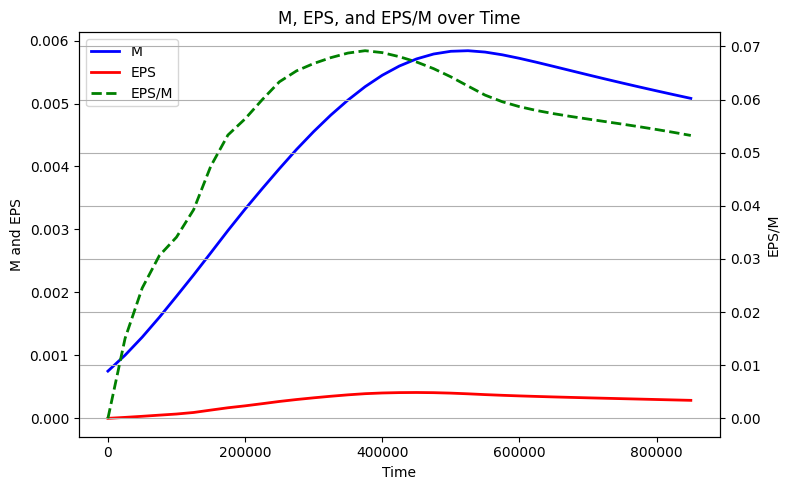

In [5]:
df['EPS_over_M'] = df['EPS'] / (df['M']+df['EPS'])

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(df['time'], df['M'], label='M', color='blue', linewidth=2)
ax1.plot(df['time'], df['EPS'], label='EPS', color='red', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('M and EPS', color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df['time'], df['EPS_over_M'], label='EPS/M', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('EPS/M')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('M, EPS, and EPS/M over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:

biomass_df = pd.read_csv('biomass.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


     time         B
0       0  0.002500
1   25000  0.005278
2   50000  0.005278
3   75000  0.005278
4  100000  0.007569


<AxesSubplot:xlabel='time'>

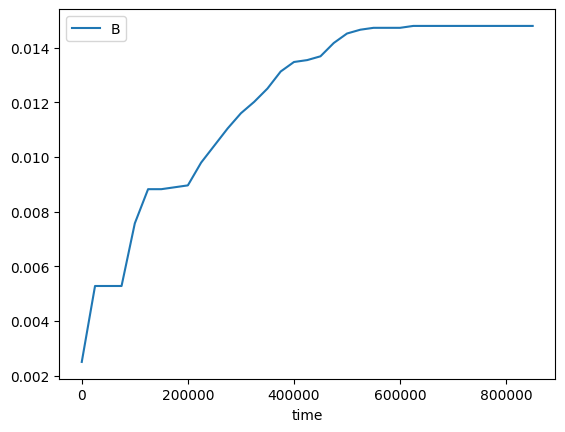

In [7]:
biomass_df.plot(x='time', y='B')